## Shopify Fall 2022 Data Science Intern Challenge

#### Yamato Tadokoro
#### 5/16/2022

### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize':(15,6)})
plt.rcParams.update({'font.size':18})

In [3]:
# import the dataset
df = pd.read_csv('Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


From these two lines of code, there are 5000 records and 7 columns in this dataset with non of them having a null value.

In [6]:
# number of unique sneaker shops
len(df.shop_id.unique())

100

### We will take a look at the basic statistical report for the `order_amount` column.

In [7]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The AOV is $3,145.12 but looking at the max value and the standard deviation, there are some data points that can be making the mean value skewed towards the left.

/Users/yamato0615/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


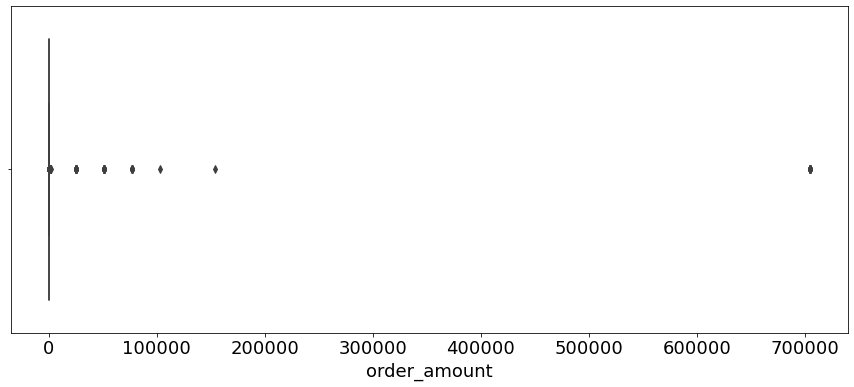

In [8]:
sns.boxplot(df.order_amount)
plt.show()

Here, this is a boxplot, but since there are huge values that are in the hundreds of thousands, we can not see the shape of the boxplot. We can see that there are outliers in the data set that impacted the average to be higher than expected. In order to find out, why this is happening, we can look by shop_id's to see which shops are causing this.

In [9]:
df.groupby(df.shop_id).order_amount.mean().nlargest(10)  

shop_id
42    235101.490196
78     49213.043478
50       403.545455
90       403.224490
38       390.857143
81       384.000000
6        383.508475
89       379.147541
33       376.275000
51       361.804348
Name: order_amount, dtype: float64

Looking at the top 10 shops by AOV, we can see that shop number 42 and 78 are causing the overall mean to increase. Their average values are more than hundred times as large as the other shops.

### There are **3** better ways to evaluate this data
1. Understand that this AOV is measured at an `aggregated level`, so simply taking the average of each of the order_amount value is not appropriate. Look for a better metric other than the average.
2. Take away the outliers and calculate the AOV.
3. Calculate the average price per item that the customer bought, rather than taking the AOV. 

### What metric would you report for this dataset?

#### Calculating the median approach

In [10]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From the previous code that showed the statistics of order_amount, we can see that the `median` is $284. This value is a much better representive and understandable value of the AOV.

#### Calculating the AOV without outliers approach

From the code that generated the outliers, we will make a new dataset that extract those two shops, 42 and 78.

In [11]:
new_data = df[(df['shop_id'] != 42)&(df['shop_id'] != 78)]
new_data.shape

(4903, 7)

In [12]:
new_data.groupby(new_data.shop_id).order_amount.mean().nlargest(5)  

shop_id
50    403.545455
90    403.224490
38    390.857143
81    384.000000
6     383.508475
Name: order_amount, dtype: float64

In [13]:
new_data.order_amount.describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64


- 97 data points were removed from the dataset, but more than 98% of the data is still held

#### Calculating the average price per item approach

In [14]:
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [15]:
df['price_per_item'] = df.order_amount / df.total_items

In [16]:
df['price_per_item'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64

- the median of the whole dataset was $284.00
- the average without outliers was $300.16
- the average price per item was $ 387.74

## Question 2

### A. How many orders were shipped by Speedy Express in total?
##### 54 orders were shipped by Speedy Express.

```SQL
SELECT ShipperName, COUNT(DISTINCT OrderID) as NumberOfOrders
FROM Orders
LEFT OUTER JOIN Shippers on Shippers.ShipperID = Orders.ShipperID
WHERE ShipperName = 'Speedy Express';
```

### B. What is the last name of the employee with the most orders?
##### Peacock with 40 orders.

```SQL
SELECT LastName, Count(DISTINCT OrderID) as NumberOfOrders
FROM Orders
LEFT JOIN Employees on Employees.EmployeeID = Orders.EmployeeID
GROUP BY LastName
ORDER BY NumberOfOrders DESC
LIMIT 1;
```

### C. What product was ordered the most by customers in Germany?
##### Boston Crab Meat was ordered the most in Germany with a total order quantity of 160.

```SQL
SELECT ProductName, SUM(Quantity) AS TotalOrders 
FROM Products p, Orders o, OrderDetails od, customers c
WHERE c.CustomerID = o.CustomerID AND c.Country = 'Germany' AND o.OrderID = od.OrderID AND od.ProductID = p.ProductID
GROUP BY ProductName
ORDER BY TotalOrders DESC
LIMIT 1;
```